# Maven Analytics - AirBnB Listing Analysis

Analyze AirBnB listings in Paris to determine the impact of recent regulations

### Objective 1 - Profile and QA the data
* Import Listings.csv
* Cast date columns to datetime format
* Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and  ‘price’
* QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [38]:
df = pd.read_csv(r"C:\Users\lalit\Dropbox\Manipal Syllabus\Sem 2\Data Analytics\Projects\Maven Analytics\AirBnb\Listings.csv",low_memory=False,encoding="ISO-8859-1")
df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [39]:
df['host_since'] = pd.to_datetime(df['host_since'])
# Another option is to use parse_dates attribute in pd.read_csv()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [45]:
paris_listings = df[df['city'].str.lower() == 'paris'.lower()]
paris_listings = paris_listings[['host_since','neighbourhood','city','accommodates','price']]
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [48]:
paris_listings.isnull().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [51]:
paris_listings.dropna(subset=['host_since'],axis=0,inplace=True)

In [52]:
paris_listings.isnull().any()

host_since       False
neighbourhood    False
city             False
accommodates     False
price            False
dtype: bool

In [53]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64657.000000,64657.000000
mean,2015-11-01 11:06:05.528867328,3.037877,113.104614
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588382,214.479626


In [62]:
zero_accommodates = paris_listings.query("accommodates == 0").count()
zero_accommodates = paris_listings.query("accommodates == 0").index

In [64]:
paris_listings.drop(zero_accommodates,axis=0,inplace=True) #Always give index in the drop() as parameter

In [65]:
paris_listings.query("accommodates == 0").count()

host_since       0
neighbourhood    0
city             0
accommodates     0
price            0
dtype: int64

In [66]:
zero_price = paris_listings.query("price == 0").index

In [68]:
paris_listings.drop(zero_price,axis=0,inplace=True)

In [69]:
paris_listings.query("price == 0").count()

host_since       0
neighbourhood    0
city             0
accommodates     0
price            0
dtype: int64

### Objective 2 - Prepare the data for visualization
* Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low    to high)
* Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column,     and add the mean price for each value of ‘accommodates’ (sorted low to high)
* Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows           representing the number of new hosts

In [87]:
paris_listings_neighbourhood = paris_listings.groupby('neighbourhood').agg({'price':'mean'}).sort_values(by='price')

In [90]:
paris_listings_neighbourhood.rename(columns = {'price':'mean_price'},inplace=True)
paris_listings_neighbourhood.head()

,mean_price
neighbourhood,
Menilmontant,74.931521
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.246196
Reuilly,89.125566
Popincourt,90.548168


In [91]:
paris_listings_neighbourhood.tail()

,mean_price
neighbourhood,
Luxembourg,155.794589
Palais-Bourbon,157.514464
Passy,161.290875
Louvre,175.754448
Elysee,211.373651


As you can see the most expensive neighbourhood is __Elysee__

In [94]:
paris_listings_accommodates = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({'price':'mean'})
    .sort_values(by='price')
)
paris_listings_accommodates.head()

,price
accommodates,
1,79.522222
3,153.882759
2,155.103352
4,212.096070
5,328.817073


In [95]:
paris_listings_accommodates.tail()

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


In [99]:
paris_listings_over_time = (
    paris_listings
    .set_index("host_since")
    .resample("YE")
    .agg({"neighbourhood":"count",
          "price":"mean"}))
paris_listings_over_time

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8866,114.217573


### Objective 3 - Visualize the data and summarize findings
* Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed
* Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title     and change axis labels as needed
* Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a        title, and change axis labels as needed
* Based on your findings, what insights do you have about the impact of the 2015 regulations on new hosts and prices?
* BONUS: Create a dual axis line chart to show both new hosts and average price over time

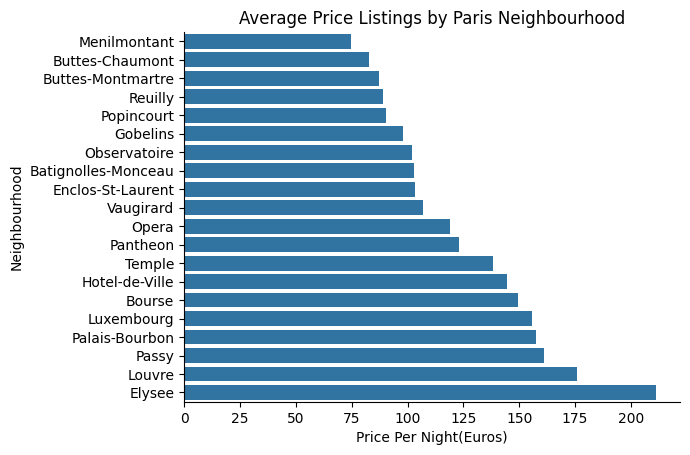

In [111]:
sns.barplot(data=paris_listings_neighbourhood,
            x='mean_price',
            y='neighbourhood',
           orient='h')
plt.xlabel('Price Per Night(Euros)')
plt.ylabel('Neighbourhood')
plt.title('Average Price Listings by Paris Neighbourhood')
sns.despine() # Used for removing the outlines

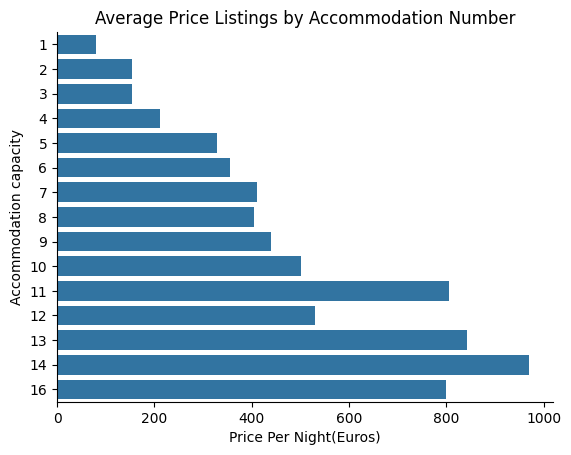

In [118]:
sns.barplot(
    data=paris_listings_accommodates,
    x='price',
    y='accommodates',
    orient='h')
plt.title('Average Price Listings by Accommodation Number')
plt.xlabel('Price Per Night(Euros)')
plt.ylabel('Accommodation capacity')
sns.despine()

Text(0, 0.5, 'New Hosts')

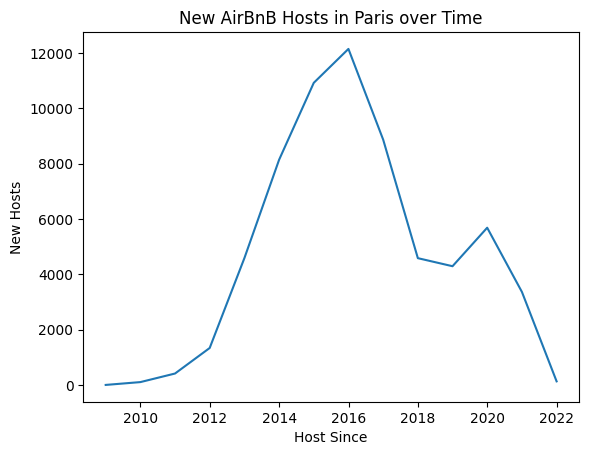

In [122]:
sns.lineplot(x=paris_listings_over_time.index,y=paris_listings_over_time['neighbourhood'])
plt.title('New AirBnB Hosts in Paris over Time')
plt.xlabel('Host Since')
plt.ylabel('New Hosts')

Text(0, 0.5, 'Price Per Night(Euros)')

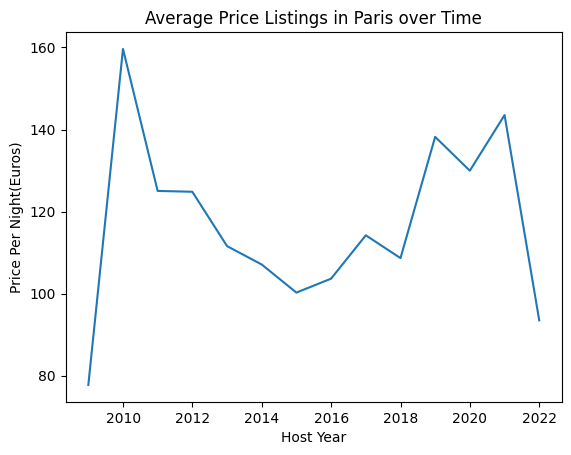

In [123]:
sns.lineplot(x=paris_listings_over_time.index,y=paris_listings_over_time['price'])
plt.title('Average Price Listings in Paris over Time')
plt.xlabel('Host Year')
plt.ylabel('Price Per Night(Euros)')

Text(0.5, 1.0, '2015 Regulations Lead to Fewer prices, More Hosts')

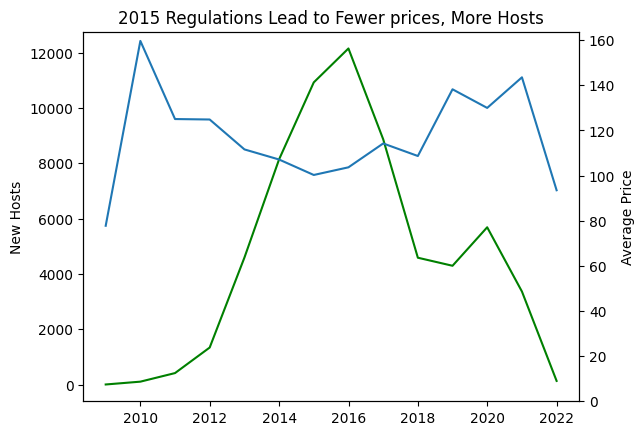

In [128]:
fig, ax = plt.subplots()

ax.plot(paris_listings_over_time.index,
        paris_listings_over_time['neighbourhood'],
        label='New Hosts',
        c='Green'
       )
ax.set_ylabel('New Hosts')

ax2 = ax.twinx() #This activates the plot to have another line chart

ax2.plot(paris_listings_over_time.index,
         paris_listings_over_time['price'],
         label='Average Price'
        )
ax2.set_ylabel('Average Price')
ax2.set_ylim(0)

ax.set_title('2015 Regulations Lead to Fewer prices, More Hosts')

From the above visualizations and analysis I can conclude that due to 2015 regulations placements, AirBnB had a fewer prices and more hosts
at the same time. After that, it risen to the top value and started reducing drastically when the pandemic hit.

# Thank you!